In [1]:
!pip3 install "pandas<2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import pandas as pd
import os
os.environ["PYTHONIOENCODING"] = "utf-8"
import warnings
warnings.filterwarnings(action='ignore')
import re


In [3]:
import json
book_review_data = pd.read_json('book_review_all.json')
book_review_data
review = book_review_data.iloc[:, -1]
# Print the last column
print(book_review_data)

     category                                       title       author  \
0          소설                                      돌연한 출발      프란츠 카프카   
1          소설                                 메리골드 마음 세탁소          윤정은   
2          소설                                    스즈메의 문단속      신카이 마코토   
3          소설                       2023 제14회 젊은작가상 수상작품집          이미상   
4          소설                     불편한 편의점(40만부 기념 벚꽃 에디션)          김호연   
...       ...                                         ...          ...   
1445  중/고등참고서       EBS 수능특강 수학영역 확률과 통계(2023)(2024 수능대비)  EBS교육방송 편집부   
1446  중/고등참고서                            쎈 고등 수학(하)(2023)          홍범준   
1447  중/고등참고서  매3문 매일 지문 3개씩 푸는 문학 수능 기출(2023)(2024 수능대비)          안인숙   
1448  중/고등참고서        100발 100중 중등 수학 2-1 기말고사 기출문제집(2023)      에듀원 편집부   
1449  중/고등참고서       EBS 수능특강 국어영역 화법과 작문(2023)(2024 수능대비)  EBS교육방송 편집부   

                                                 review  
0     [얼마나 재밌을지 기대되요, 표지도 너무 이쁘고 책의날 카프카를 읽을수 있었네요, .

In [4]:
df = pd.DataFrame(book_review_data)

# review의 개수를 계산하여 새로운 열(review_count)을 추가
df['review_count'] = df['review'].apply(len)

# review_count를 기준으로 내림차순 정렬하여 상위 10개 행 출력
top_10_reviews = df.nlargest(10, 'review_count')
print(top_10_reviews)

    category                        title    author  \
90     시/에세이         언어의 온도(170만부 기념 에디션)       이기주   
89     시/에세이                       여행의 이유       김영하   
4         소설      불편한 편의점(40만부 기념 벚꽃 에디션)       김호연   
98     시/에세이            죽고 싶지만 떡볶이는 먹고 싶어       백세희   
116       인문                         사피엔스    유발 하라리   
532    역사/문화                  설민석의 조선왕조실록       설민석   
28        소설         달러구트 꿈 백화점(레인보우 에디션)       이미예   
754       과학                         코스모스     칼 세이건   
354    경제/경영  부자 아빠 가난한 아빠 1(20주년 특별 기념판)  로버트 기요사키   
60     시/에세이                  꽃을 보듯 너를 본다       나태주   

                                                review  review_count  
90   [한번쯤은 읽어볼만 하지만 생각보다 저에게 와닿는 책은 아닌것 같아요, 재미있게 잘...          4562  
89   [역시 김영하 작가님입니다. 잘 읽었어요!, 잔잔하니 힐링되고 좋았어요., 문장 하...          3089  
4    [읽다보니 시간 잘가고 재밌어요, 순식간에 읽어 내려감, 사람과 사람간의 얘기가 좋...          2905  
98   [유명한 책..그냥그랬어요, 유명한 책..그냥그랬어요, 친구추천으로 잘감사했습니다,...          2511  
116  [600여 페이지 완독까지 오랜 시간이 걸렸지만, 살면서 반드

In [5]:
text_1=review[90] #리뷰가 많은 책 7권 리뷰 다운로드해서 직접 긍정 부정 라벨링 하기
print(text_1)

['한번쯤은 읽어볼만 하지만 생각보다 저에게 와닿는 책은 아닌것 같아요', '재미있게 잘 읽었어요', '마음이 예뻐지는 말들이 담긴 책', '그저그런 글 모아놓은, 얼마 지나지 않아 대부분의 사람들의 기억 속에서 잊혀질 별로인 책. 선물받아서 읽다가 도저히 못 읽겠었음. 이런 책 읽을 시간에 위대한 고전 읽고 또 읽는 게 낫다고 생각', '문장 하나하나 진력을 다한 느낌.', '꼭 소장하고 두고두고 볼수있는책', '모든이가 공감 할수있는도서', '마음이 편안해지는 위안받는!', '잘 읽었습니다 좋아요', '좋아요~~^~~~~~~!!', '언어의온도에따라 달라짐', '한 문장 한 문장 너무 재밌게 봤어요', '첨 읽어봤는데 재밌습니다', '감명깊게 읽었어요.', '부담없이 좋아요. 추천해요', '여러 번 읽고 싶은 책입니다 : )', '나이가 들어도 말의 실수는 줄어들지 않으니, 그런 점에서 고마운 책이다.', '한문장 한문장이 와닿아서 좋아요', '너무 좋아하는 책이라 벌써 세번째 구매해요,,ㅎㅎ', '좋은책을만나 행복합니다', '요즘 읽는중인데 공감되는 내용도 많고 재밌습니다!!', '👍🏻👍🏻👍🏻👍🏻 강추해요', '너무좋은책입니다 잘읽을게요', '인간의 살아가는 현상에 깊은 통찰을 줍니다. 특히 분노파트는 분노로 인해 심리적인 어려움을 겪고있는 모든 분들이 보았으면 합니다', '흔한 내용이고 생각보다 재미없습니다', '표지도 맘에 들고 너무 좋아요', '워낙 유명한 책이라 구매했습니다. 기대됩니다', '말을 상대방한데 하기전에 다시 생각하고 해야겠네요', '', '즐겁게 잘 읽었어요 유익해요', '다시 한 번 읽고싶어서 구매한 책이에요. 한 번 읽고 넘기기에는 아쉬운 책인거 같아요', '말의 온도에 대해 느끼게 해준 책입니다', '재미없었어요... 별로에요', '언에어 대해 새로운 인식', '추운날 쉽고 공감되면서 읽을 수 있는 책 이네요\n잘 읽고 있어요', '감사합니다 잘 받았습니다', '', '최고에요최고에요최고', '', '언어에서 느껴지는 따스함',

In [6]:
text_1 = pd.Series(text_1)
text_1=text_1.str.replace('[^가-힣]', ' ', regex = True) #'정규표현식'을 통해 불필요한 특수문자 등을 제거
print(text_1)

0                   한번쯤은 읽어볼만 하지만 생각보다 저에게 와닿는 책은 아닌것 같아요
1                                             재미있게 잘 읽었어요
2                                       마음이 예뻐지는 말들이 담긴 책
3       그저그런 글 모아놓은  얼마 지나지 않아 대부분의 사람들의 기억 속에서 잊혀질 별로...
4                                      문장 하나하나 진력을 다한 느낌 
                              ...                        
4557    일상에서의 이야기와 한 번 정도는 스쳐지나갔을 생각들을 담담하게 풀어나간  마음이 ...
4558    원래 이런류의 책들을 보며 그닥 흥미가 가진 않았었어요 근데 서문부터 언어의 온도의...
4559         너무교훈적이지도 않고 부담스럽지않은 내용  새벽에 감성을 자극하는 좋은 글입니다
4560                                   이상하게 나를 울게한 책 따뜻하다
4561                   소박한 이야기를 덤덤하게 구성했지만 깊은 맛이 느껴지는    
Length: 4562, dtype: object


In [7]:
df = pd.DataFrame(text_1)

# DataFrame을 엑셀 파일로 저장
df.to_excel('언어의온도.xlsx', index=False)

In [8]:
datalabel = pd.read_excel('datalabel.xlsx', header=0) #라벨링한 데이터가져오기 라벨이 오름차순으로 정렬되어있음
datalabel.info()
datalabel = datalabel[datalabel['review'].notnull()]
datalabel = datalabel[datalabel['label'].notnull()]  #null 제거
datalabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   18249 non-null  int64  
 1   review  18161 non-null  object 
 2   label   18034 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 427.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18033 entries, 0 to 18033
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   18033 non-null  int64  
 1   review  18033 non-null  object 
 2   label   18033 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 563.5+ KB


In [9]:
ranges = [(1, 528), (1057, 1584)] #긍정리뷰, 부정리뷰가 반반씩 들어가도록 조정
frames = [datalabel.iloc[start-1:end] for start, end in ranges]
# 모든 결과를 병합하여 최종 데이터프레임 생성
trainbook = pd.concat(frames)
trainbook.columns = ['index', 'review', 'label']
trainbook.info()
trainbook['label'] = trainbook['label'].astype(int) #int로 변환

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 1583
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1056 non-null   int64  
 1   review  1056 non-null   object 
 2   label   1056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.0+ KB


In [10]:
ranges = [(529,1056), (1585,2112)] #긍정리뷰, 부정리뷰가 반반씩 들어가도록 조정
frames = [datalabel.iloc[start-1:end] for start, end in ranges]
# 모든 결과를 병합하여 최종 데이터프레임 생성
testbook = pd.concat(frames)
testbook.columns = ['index', 'review', 'label']
testbook.info()
testbook['label'] = testbook['label'].astype(int) #int로 변환

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 528 to 2111
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1056 non-null   int64  
 1   review  1056 non-null   object 
 2   label   1056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.0+ KB


In [11]:
!pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from konlpy.tag import Okt

okt = Okt()

In [13]:
def okt_tokenizer(text):  #형태소 분석해 토큰화
    tokens = okt.morphs(text)
    return tokens

In [14]:
#TF-IDF 기반 피처 벡터 생성
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
#min_df=3번이상은 나오는 단어만 사용하기. max_df=90퍼센트 이상 출현 단어는 배제
tfidf.fit(trainbook['review'])
trainbook_tfidf = tfidf.transform(trainbook['review'])  #벡터로 트랜스폼

In [15]:
#로지스틱 회귀 기반 분석모델 생성
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)

In [16]:
SA_lr.fit(trainbook_tfidf, trainbook['label'])

LogisticRegression(random_state=0)

In [17]:
#로지스틱 회귀의 best 하이퍼파라미터 찾기
from sklearn.model_selection import GridSearchCV
#성능 향상화시키기
params = {'C': [1, 3, 3.5, 4, 4.5, 5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [18]:
#최적분석모델훈련
SA_lr_grid_cv.fit(trainbook_tfidf, trainbook['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [19]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_, 4)) #정확도 계산.

{'C': 5} 0.8674


In [20]:
# 최적 파라미터의 best 모델 저장 #최적의 매개변수와 점수찾기
SA_lr_best = SA_lr_grid_cv.best_estimator_

In [21]:
#평가용 데이터로 모델 정확도 파악하기
# 평가용 데이터의 피처 벡터화하기
testbook_tfidf = tfidf.transform(testbook['review'])

In [22]:
test_predict = SA_lr_best.predict(testbook_tfidf)

In [23]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ', round(accuracy_score(testbook['label'], test_predict), 3))

감성 분석 정확도 :  0.825


In [86]:
#새로운 리뷰에 대해 감성분석 적용
def sentiment_analysis(tfidf, SA_lr_best):
    st = input('감성 분석할 문장입력 >> ')
    # 0) 입력 텍스트에 대한 전처리 수행
    st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
    st = [" ".join(st)]
    # 1) 입력 텍스트의 피처 벡터화
    st_tfidf = tfidf.transform(st)
    # 2) 최적 감성분석 모델에 적용하여 감성 분석 평가
    st_predict = SA_lr_best.predict(st_tfidf)
    # 3) 예측 값 출력하기
    if(st_predict== 0):
        print(st , "->> 부정적인 리뷰")
    else :
        print(st , "->> 긍정적인 리뷰")

sentiment_analysis(tfidf, SA_lr_best)

감성 분석할 문장입력 >> 이런 책에 돈쓰는 게 아깝다. 별로임.
['이런 책에 돈쓰는 게 아깝다 별로임'] ->> 부정적인 리뷰


In [24]:
#'꽃을 보듯 너를 본다' 리뷰 분류해보기
text_3=review[60]
text_3 = pd.Series(text_3)
text_3=text_3.str.replace('[^가-힣]', ' ', regex = True) #'정규표현식'을 통해 불필요한 특수문자 등을 제거
text_3 = pd.DataFrame(text_3, columns=['review'])
print(text_3)

                                                 review
0                                            마음에 깊이 남아요
1                                            좋아요 풍부한 감성
2                      선물했어요   많이 좋아하네요   공감돼고 따뜻한 책이에요
3                               따라써보면서 음미하는데 아주 좋은 책이에요
4                                 마음이 따뜻해지는 기분 좋은 책입니다 
...                                                 ...
1608  오늘 배송와서 받자마자 바로 읽어봤는데 역시 많은 분들이 추천하는데에는 이유가 있는...
1609                                        가볍게 읽기 좋네요 
1610  내용을 입력해주세요  주제와 무관한 댓글  악플  배송문의 등의 글은 임의 삭제될 ...
1611                                         잘 읽을게요 기대됨
1612  교보문고 본점에 걸린 시 구절이 잊혀지지 않아 드디어 시집을 샀어요  나태주 시인 ...

[1613 rows x 1 columns]


In [25]:
# 1) 분석할 데이터의 피처 벡터화
text_3_tfidf = tfidf.transform(text_3['review'])

# 2) 최적 파라미터 학습모델에 적용하여 감성 분석
text_3_predict = SA_lr_best.predict(text_3_tfidf)

# 3) 감성 분석 결과값을 데이터 프레임에 저장
text_3['label'] = text_3_predict

text_3.head()

,review,label
0,마음에 깊이 남아요,1
1,좋아요 풍부한 감성,1
2,선물했어요 많이 좋아하네요 공감돼고 따뜻한 책이에요,1
3,따라써보면서 음미하는데 아주 좋은 책이에요,1
4,마음이 따뜻해지는 기분 좋은 책입니다,1


In [26]:
print(text_3['label'].value_counts())

1    1357
0     256
Name: label, dtype: int64


In [27]:
#긍정과 부정을 분류해 결과를 저장

columns_name = ['review','label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in text_3.iterrows():
    review = data["review"]
    label = data["label"]

    if label == 0: # 부정 감성 샘플만 추출
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[review,label]],columns=columns_name),ignore_index=True)
    else : # 긍정 감성 샘플만 추출
        POS_data_df = POS_data_df.append(pd.DataFrame([[review,label]],columns=columns_name),ignore_index=True)

# 파일에 저장.
NEG_data_df.to_csv('꽃긍정리뷰.csv', encoding='euc-kr')
POS_data_df.to_csv('꽃부정리뷰.csv', encoding='euc-kr')

In [28]:
1357/(256+1357) #실제 평점 9.38보다 낮게 나옴. 사람들이 말은 안 좋게 써도 평점은 좋게 주는 경향이 있음.

0.8412895226286423

In [29]:
POS_review = POS_data_df['review']
POS_review_noun_tk = []

for d in POS_review:
    POS_review_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

POS_review_noun_join = []

for d in POS_review_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰은 제외
    POS_review_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성
print(POS_review_noun_join)  #작업 확인용 출력

['마음 깊이 남아', '감성', '선물 공감', '음미 아주', '마음 기분', '', '나태주 시인', '시인 가장 문장 가장 아른 다운 표현', '가장 문장 가장 마음 표현', '마음', '', '', '역시 나태주 공감', '물용 최고', '화이팅', '', '마음', '', '나태주 항상 마음', '추천 도서 구입', '', '', '', '정말 최고 마음', '', '', '선물', '문장', '역시 나태주 시인', '굿굿', '파트 시집', '애송하 시집 간직 시집 최고', '교통 방송 스윗 멜로디 김상 아나운서 추천 구매 우리 주말 코너', '', '역시 나태주 시인', '구매 역시', '교통 방송 김상 아나운서 스윗 멜로디 우주 코너 추천 나태주 시인 모시 영광', '', '시가', '', '', '마음', '마음', '내용', '시집 처음 구매 술술 시집', '', '', '', '', '', '', '', '사랑 대한 감정 감정', '선물 선물 꽃내음 가득 문장', '위로 한장 평안', '', '마음', '낭독', '마음 역시 나태주', '아들 구매', '감성', '감성 충만 감동 환기 마법 시집 마음 직할 사람 선물 시집', '시집 친구 선물', '사람 대해', '어머니 선물 매우', '내용 마음 지인 선물', '마음', '역시 나태주 시인', '역시 나태주 시인', '누군가', '마음속 위안 정독', '마음 어루어 시집', '선물 친구', '', '', '감명', '감명 추천', '', '', '친구 선물', '마음 위안', '', '여유', '', '감성 마음', '시집 처음 구매 역시 나태주 시인 생각 기분', '힐링 됩닏', '', '', '마음', '선물', '마음', '마음 황폐 질때 치유', '최고 역시 나태주', '', '', '마음', '선물 최고', '글귀', '사람 선물', '문장 하나 하나 시집', '', '남편 선물', '사랑', '지인 선물 세번 구입 누군가 감상 시집', '생각', '가을', '하나', '마음',

In [30]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )#2보다는많이 나와야 의미있음, okt함수를 토크나이저로 사용
POS_dtm = POS_tfidf.fit_transform(POS_review_noun_join)
#dtm=단어들을 포함하는 매트릭스

POS_vocab = dict() #긍정단어 해당하는 사전 만듦

for idx, word in enumerate(POS_tfidf.get_feature_names_out()): #scikit learn 버전 업에 따른 함수 명 변경 get_feature_names() -> get_feature_names_out()
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True) #내림차순 정렬

In [103]:
POS_words  #작업 확인용 출력

[('마음', 176.14418033695551),
 ('선물', 93.78911554227166),
 ('시집', 57.465004837130024),
 ('사랑', 31.593633407504754),
 ('나태주', 28.39203579481316),
 ('힐링', 26.137250654452135),
 ('사람', 23.933381519836644),
 ('시인', 23.799289926732236),
 ('구매', 21.945443654199035),
 ('생각', 19.467964151483763),
 ('추천', 17.89829166144606),
 ('시가', 17.725465499773698),
 ('내용', 16.81244724129701),
 ('정말', 16.336995626837826),
 ('보고', 14.83295546782626),
 ('기대', 14.069821194966309),
 ('글귀', 13.766552804264741),
 ('역시', 13.382204417646797),
 ('느낌', 13.175230932438314),
 ('기분', 12.99253741014418),
 ('구입', 12.56741648851225),
 ('가슴', 11.59863340477462),
 ('하나', 11.540775800278048),
 ('감성', 11.521343539611639),
 ('아주', 11.140548987913906),
 ('소장', 10.35406440276057),
 ('감동', 9.23324739477031),
 ('친구', 9.13477798381994),
 ('제목', 8.47952659259164),
 ('최고', 8.328357860151339),
 ('정화', 8.1623927935291),
 ('위로', 8.109904522161091),
 ('공감', 7.496896509774023),
 ('시간', 7.272274716091204),
 ('작가', 7.239870908289735),
 ('문장',

In [31]:
NEG_review = NEG_data_df['review']
NEG_review_noun_tk = []

for d in NEG_review:
    NEG_review_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

NEG_review_noun_join = []

for d in NEG_review_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰은 제외
    NEG_review_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성
print(NEG_review_noun_join)  #작업 확인용 출력

['향기', '참으로 제목 선택 시집 나태주 참으로', '', '제목 그대로', '정말 힐링 그림', '감성 다시', '아이 시집', '진실 사랑 여러 사서 가족 선물', '한페이 한페이', '감성 이예', '감성 시집 진심 감성 진동 눈물 바가지', '이유', '존잼 대박 말로', '저절로 미소 시집 마음 기분 영혼 정화 표지 디자인 그림 일러스트 소장 가치 서문 말기 행성 지구 종이 행위 나무 햇빛 생각 듭니 잠시 안녕 말씀', '나태주 시인', '기분', '울림 작품', '도전', '내용', '딸아이 시집 선택', '시집 보고 표지 필사', '시집 진짜 만이', '', '시집 블로그 트위터 자주 서문 참고', '언제', '사랑 주제 하나 마음', '평론 허구 아군 저작권 소유자 직조 텍스트 시대 사람 초적 본능 강요 기술자 원래 누가 이상 강요 학습 그것 보라 코딱지 차라리 톅스트 자체 권력 이익 명성 순수 즐거움 바르트 김시습 생각 보라 조금 사기꾼 소리 대한민국 모든 분야 탈진 실의 헤게모니 극복 문화 강국 이기 독서 참으로 장난', '원래', '처음 사서 시집', '감동 가슴속 여운', '나태주 시인 내면 수록 마음속 서서히 느낌 요즘 실속', '', '사랑 관련 내용 자연 표현 나태주 시인 자연사', '사람 내용', '시집 감성 충전 기분', '리뷰 정도 시집', '짝사랑 누구 다른 사랑', '들꽃 아름 다운 글안 여운', '감성 아리 기도', '시도 책표지', '내용 소장 구입', '감동 정말 공감 감명', '정말 말로 표현 어휘 원망', '보기 내용', '인스타 보고 구매', '', '워낙 시집 인터넷 시집 구매 선물 시인 만족 서비스 자체 실망 역시 자주 서점 이유 클래식 생각 달라 시집 선물 고민 한번 제목 수능 시험지 필체 인용 문구 수능 위로 가득 만듬새 시집 보시', '손글씨 구입 내용', '디자인 무엇 시인', '사람', '기분 글귀', '나태주 시집 시집 시인 나태주 가운데 인터넷 블로그 트위터 자주 사랑 답함 바람 그리움 못난이 

In [32]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
NEG_dtm = NEG_tfidf.fit_transform(NEG_review_noun_join)
NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names_out()): #scikit learn 버전 업에 따른 함수 명 변경 get_feature_names() -> get_feature_names_out()
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)

In [107]:
NEG_words   #작업 확인용 출력

[('시집', 20.12983279052152),
 ('감성', 11.482278108902099),
 ('제목', 11.261288746562414),
 ('시인', 10.069186984372656),
 ('나태주', 10.00938210880258),
 ('기분', 9.985125245799791),
 ('내용', 9.694032086221384),
 ('사랑', 8.478249761312922),
 ('생각', 7.518516219407445),
 ('보고', 6.6750738185851555),
 ('구입', 6.628515717084547),
 ('느낌', 6.302969225487172),
 ('마음', 5.790057432504558),
 ('사람', 5.736483426186238),
 ('선물', 5.324753932943803),
 ('구매', 4.963651562688856),
 ('공감', 4.95107194318968),
 ('정말', 4.9076601903999455),
 ('기대', 4.654408242161258),
 ('여운', 4.469744942577844),
 ('처음', 4.098136042533521),
 ('아이', 3.7389870123425215),
 ('하나', 3.5278210722604815),
 ('시가', 3.2453895317838546),
 ('가을', 3.2440228812950496),
 ('감동', 2.9226167942107475),
 ('다시', 2.7246278133214368),
 ('말로', 2.620472546327296),
 ('그냥', 2.5802465632021327),
 ('보아', 2.3887549452438015),
 ('문구', 2.300052686209805),
 ('울림', 2.2806593549403673),
 ('주제', 2.265367028787447),
 ('배송', 2.260747616265489),
 ('연애', 2.238995405491464),
 ('표현'

In [33]:
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') #이 셀의 경우 코랩과 로컬 코드에 차이가 있음

max = 15  #바 차트에 나타낼 단어의 수

In [34]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


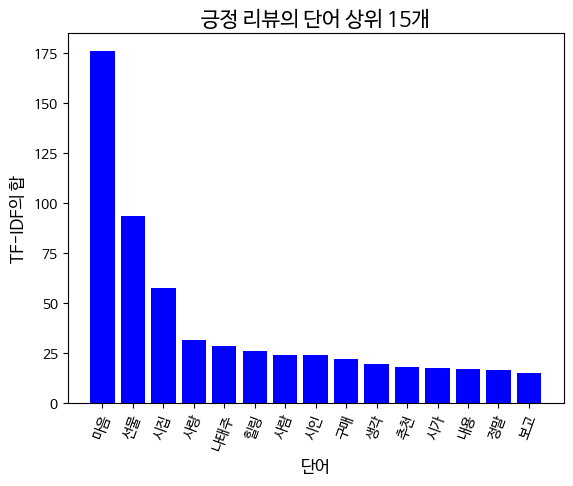

In [35]:
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 리뷰의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()

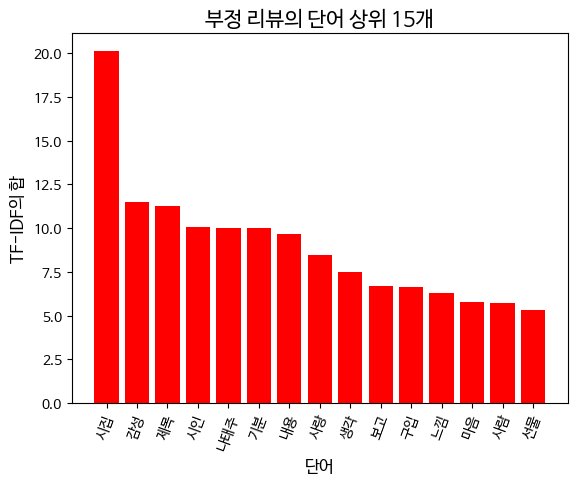

In [36]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 리뷰의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()